In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import layers 

In [2]:
# specifying dataset paths
data_train_path = r'C:\Users\rishi\Desktop\Ripe unripe images\train images'

data_val_path = r'C:\Users\rishi\Desktop\Ripe unripe images\validation images'

In [3]:
# since everyimage is of different size to convert into fixed size
image_width = 180
image_length = 180

In [4]:
# to convert the train dataset into arrays we use tf functionality
data_train = tf.keras.utils.image_dataset_from_directory(

    data_train_path, # dataset path

    shuffle = True, # dataset shuffling

    image_size = (image_width,image_length), # to resize the image

    batch_size = 32, # batch_size=32: This means that the dataset is divided into batches of 32 images each
    
    validation_split =False    # if the dataset is not previuosly divided into traning and validation this can help

)

Found 142 files belonging to 2 classes.


In [5]:
data_train.class_names

['ripe', 'unripe']

In [6]:
# storing different category
data_cat = data_train.class_names

In [7]:
# to convert the  val dataset into arrays we use tf functionality
data_val = tf.keras.utils.image_dataset_from_directory(

    data_val_path, # dataset path

    shuffle = False, # dataset shuffling

    image_size = (image_width,image_length), # to resize the image

    batch_size = 32, # batch_size=32: This means that the dataset is divided into batches of 32 images each
    
    validation_split =False    # if the dataset is not previuosly divided into traning and validation this can help

)

Found 35 files belonging to 2 classes.


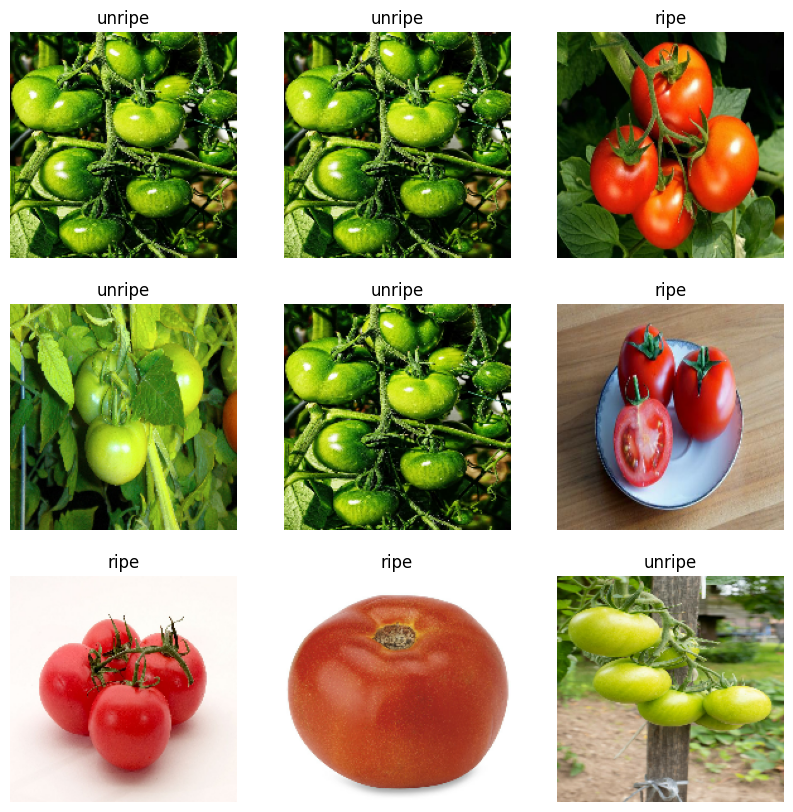

In [8]:
# to display images
plt.figure(figsize=(10,10)) # This line creates a new figure for plotting with a specified size of 10 inches by 10 inches

for image, labels in data_train.take(1): # This function takes the first batch of images and labels from the data_train dataset.

    for i in range(9): # This loop runs 9 times, allowing you to display 9 images (in a 3x3 grid).

        plt.subplot(3,3,i+1) # create subplot 3,3: Specifies a 3x3 grid of subplots, i - position

        plt.imshow(image[i].numpy().astype('uint8')) # .numpy(): Converts the TensorFlow tensor to a NumPy 

        plt.title(data_cat[labels[i]]) # used for title labels[i]: Retrieves the label for the i-th image in the batch,  maps label indices to category names. 
        
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential([
    layers.Rescaling(1/255), # pixel value [0-255] to [0-1]
    layers.Conv2D(16,3,padding = 'same',activation='relu'), # 16 filters size 3*3 to detect features
    layers.MaxPooling2D(), # padding same ensures the output feature map is same as input feature map by adding zero around bordes
    layers.Conv2D(32,3,padding ='same',activation='relu'),
    layers.MaxPooling2D(), # performs down-sampling helping to reduce computational complexity and control overfitting
    layers.Conv2D(64,3,padding ='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), # converts the 2D feature maps into a 1D vector.
    layers.Dropout(0.2), # randomly sets 20% of the input units to zero during training
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [11]:
model.compile(optimizer = 'adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
epochs_size = 20
history = model.fit(data_train,validation_data = data_val,epochs = epochs_size,verbose=1)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.5811 - loss: 4.8746 - val_accuracy: 0.5143 - val_loss: 2.8585
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.4776 - loss: 2.1297 - val_accuracy: 0.4857 - val_loss: 0.7165
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.7076 - loss: 0.4220 - val_accuracy: 0.9714 - val_loss: 0.2762
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.9482 - loss: 0.2181 - val_accuracy: 0.9714 - val_loss: 0.1541
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.9461 - loss: 0.1374 - val_accuracy: 0.9429 - val_loss: 0.3174
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.9430 - loss: 0.1497 - val_accuracy: 0.9429 - val_loss: 0.2212
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.9736 - loss: 0.1051 - val_accuracy: 0.9429 - val_loss: 0.1367
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.9814 - loss: 0.0672 - val_accuracy: 0.9714 - val_loss:

Text(0.5, 1.0, 'Loss')

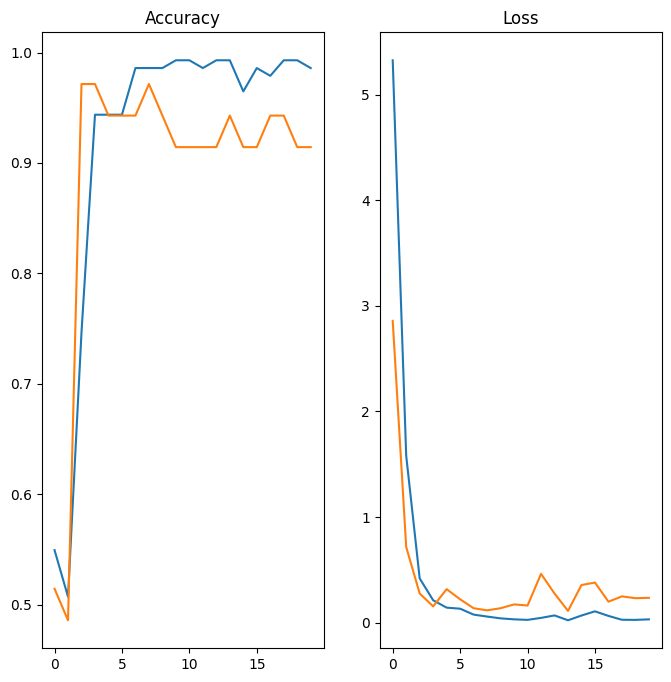

In [13]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Traning Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Traning loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation loss')
plt.title('Loss')

In [14]:
image =r'C:\Users\rishi\Desktop\Ripe unripe images\validation images\unripe\unriped_tomato_63.jpeg'
image = tf.keras.utils.load_img(image, target_size=(image_length,image_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0) # This line adds an extra dimension to the image array, making it a "batch" of one image.

In [15]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [16]:
score = tf.nn.softmax(predict)

In [17]:
score

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.00179605, 0.998204  ]], dtype=float32)>

In [18]:
print('Tomato in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Tomato in image is unripe with accuracy of 99.82


In [19]:
model.save('Image_Classify.keras')

In [20]:
model.save('model.h5')